# Hamiltonian Cycles on n-Hypercubes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from graphviz import Digraph

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
class PathTree:
    def __init__(self, state=0, history=[], dimension=3, depth=0):
        
        # Integer representing the current position along the hypercube
        self.state = state
        
        self.history = history
        
        # Dimension of the hypercube
        self.dimension = dimension
        
        # Depth of tree (root node is depth 0)
        self.depth = depth
        
       
        def validCandidate(n):
            # Case 1: Completed cycle of hypercube
            if self.depth == 2**self.dimension-1 and n == 0:
                return True

            # Case 2: Check to see if candidate state has been reached
            return n not in self.history
        
        candidates = filter(validCandidate,
                            (self.state ^ (1 << i) for i in range(dimension)))
        
        # Rose tree data structure representing totality of computation
        # Constructor is recursively invoked to generate all valid child trees
        self.children = [PathTree(state = c,
                                  history = self.history + [self.state], 
                                  dimension = dimension, 
                                  depth = depth  +1) 
                         for c in candidates
                        ]
        
        # True if node lies along valid path
        self.color = depth == 2**dimension or any(c.color 
                                                  for c in self.children)
        
        # Size of entire tree
        self.size = 1 + sum(c.size for c in self.children)
        
        # Number of nodes that lie along a valid path
        self.valid = 0 if not self.color else 1 + sum(c.valid
                                                      for c in self.children)
        
        # Number of valid paths
        self.pathCount = 1 if depth == 2**dimension else sum(c.pathCount
                                                         for c in self.children)

12 unique Hamiltonian cycles


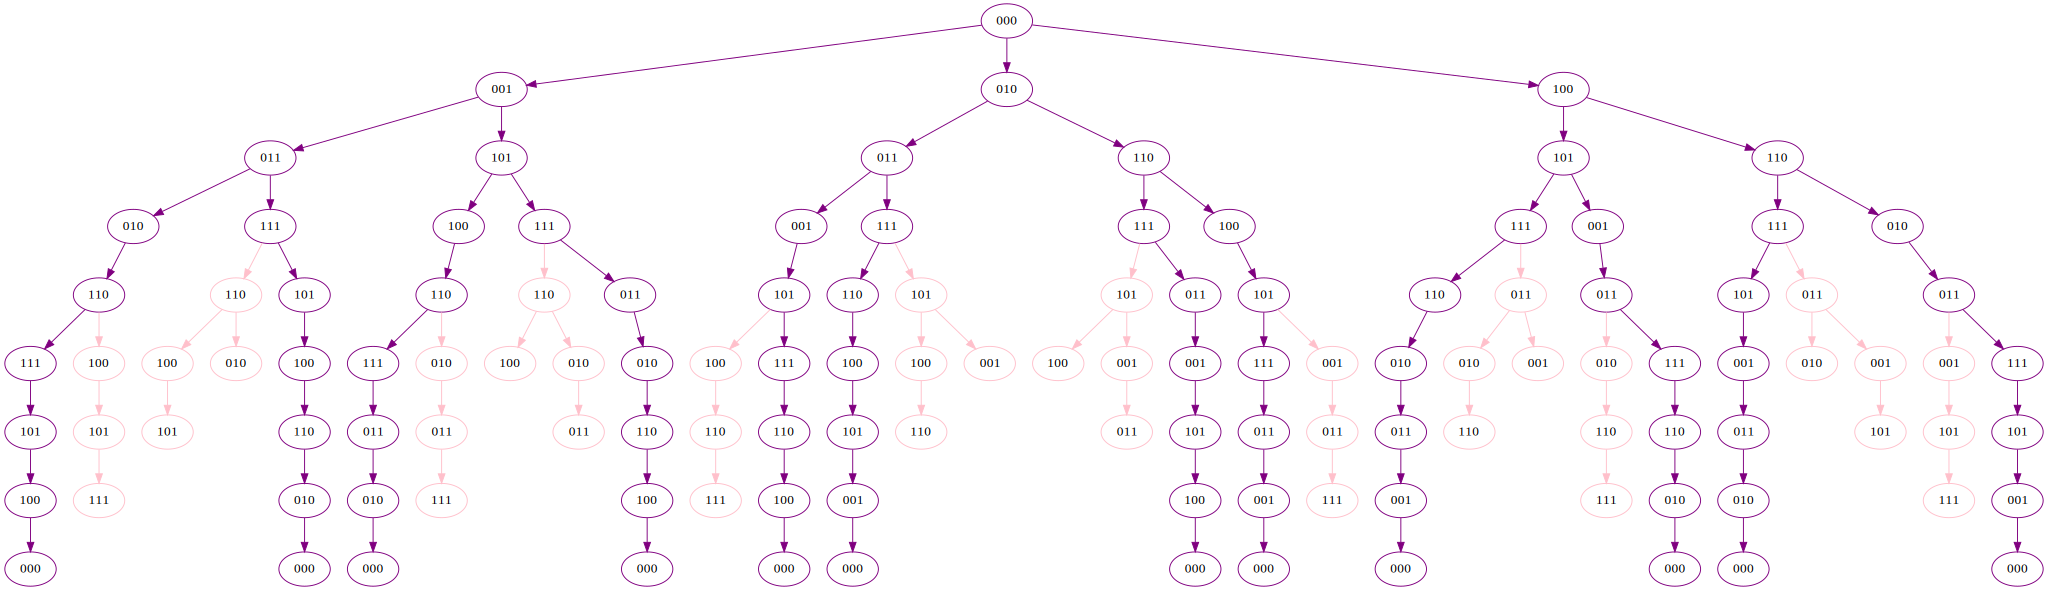

In [3]:
def binaryPad(state, n):
    # Drop the '0b' prefix
    s = str(bin(state))[2:]

    # Drop leading whitespace
    while len(s) > 1 and not s[0]:
        s = s[1:]

    # Prepend '0' characters to returned string
    return (n - len(s)) * '0' + s


# Recusive function called by `visualize` to populate dot graph
def graph(tree, dot):
    dot.node(name = str(tree), 
             label = binaryPad(tree.state, tree.dimension),
             color = 'purple' if tree.color else 'pink')
    for child in tree.children:
        dot.edge(str(tree), 
                 str(child),
                 color = 'purple' 
                 if tree.color and child.color 
                 else 'pink')
        graph(child,dot)
    
threeCube = PathTree(dimension=3)
print(threeCube.pathCount, "unique Hamiltonian cycles")
dot = Digraph()

graph(threeCube, dot)
dot

000 → 001 → 011 → 010 → 110 → 111 → 101 → 100 → 000
000 → 001 → 011 → 111 → 101 → 100 → 110 → 010 → 000
000 → 001 → 101 → 100 → 110 → 111 → 011 → 010 → 000
000 → 001 → 101 → 111 → 011 → 010 → 110 → 100 → 000
000 → 010 → 011 → 001 → 101 → 111 → 110 → 100 → 000
000 → 010 → 011 → 111 → 110 → 100 → 101 → 001 → 000
000 → 010 → 110 → 111 → 011 → 001 → 101 → 100 → 000
000 → 010 → 110 → 100 → 101 → 111 → 011 → 001 → 000
000 → 100 → 101 → 111 → 110 → 010 → 011 → 001 → 000
000 → 100 → 101 → 001 → 011 → 111 → 110 → 010 → 000
000 → 100 → 110 → 111 → 101 → 001 → 011 → 010 → 000
000 → 100 → 110 → 010 → 011 → 111 → 101 → 001 → 000


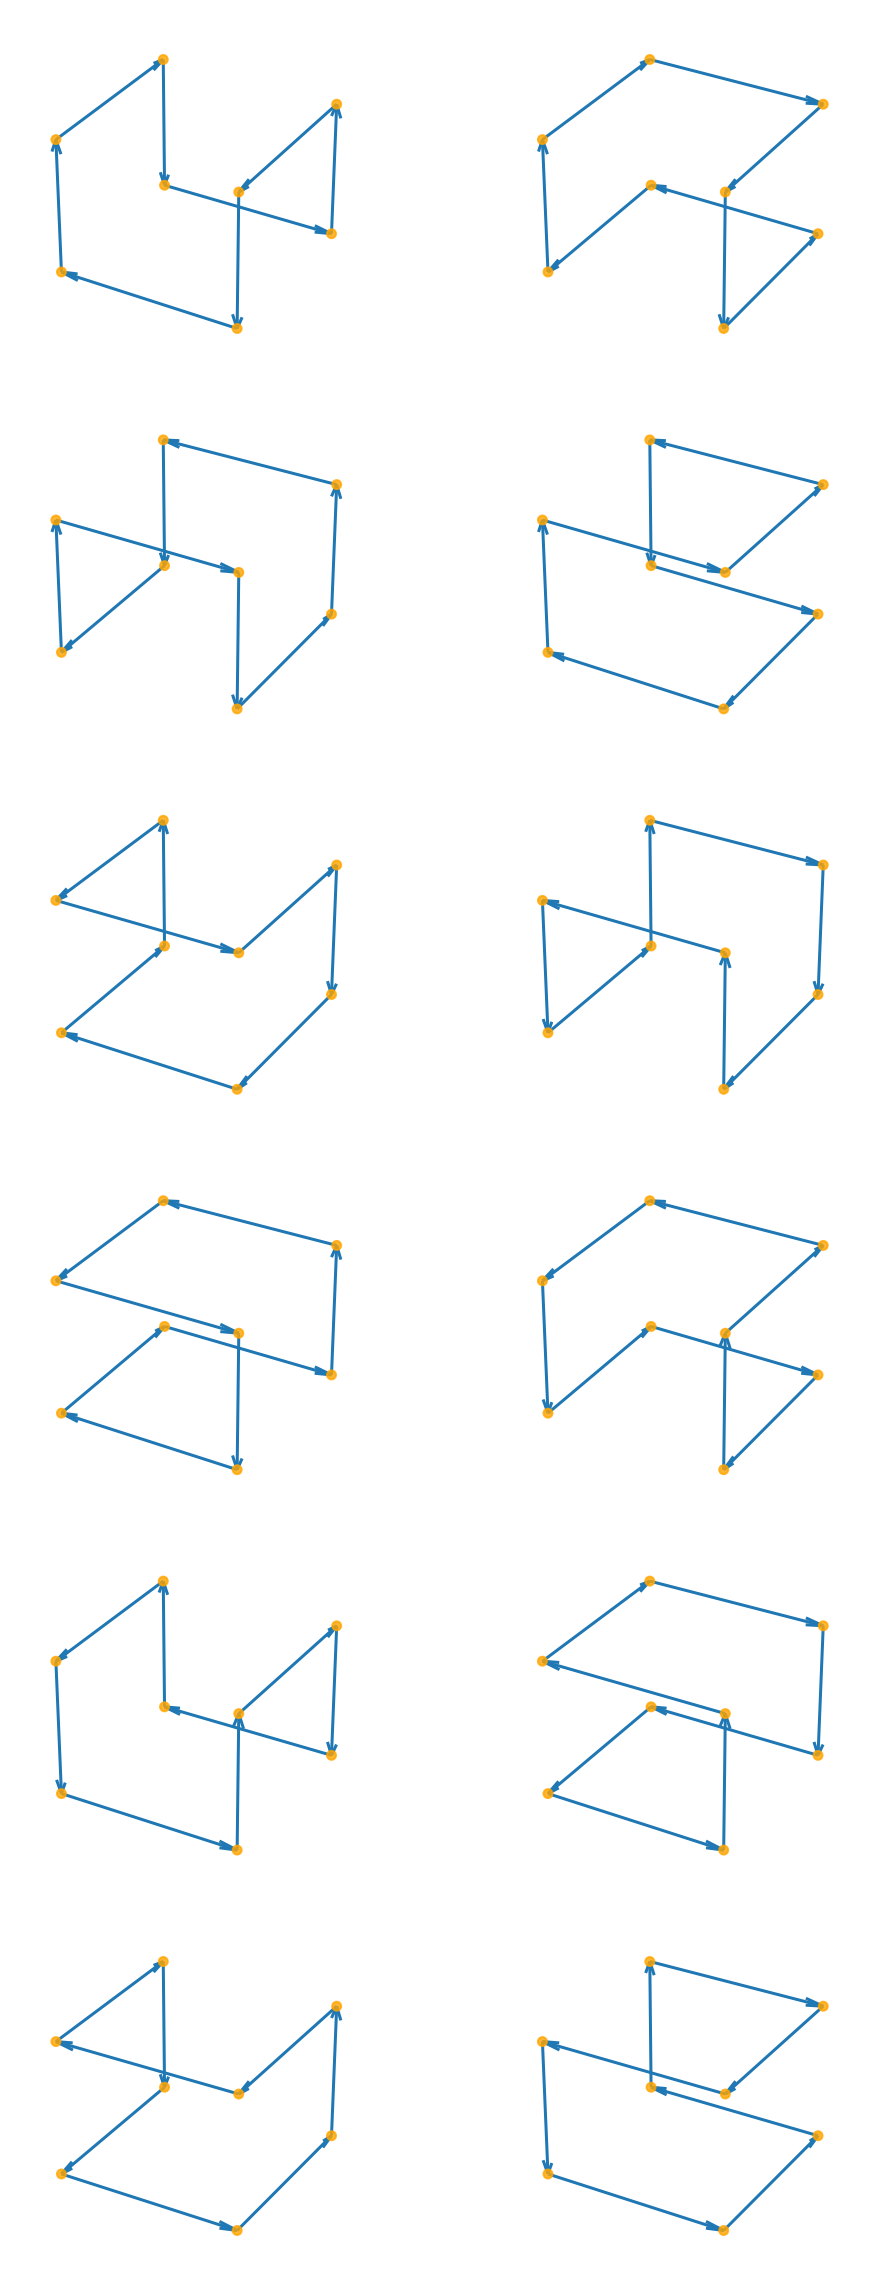

In [4]:
def allCycles(tree):  
    # Base case: completed path 
    if tree.depth == 2**tree.dimension:
        return [tree.history + [tree.state]]
    # Recursive case: combine cycles found in child subtrees
    return [p for c in tree.children for p in allCycles(c)]

# Compute 3 dimensional embedding for vertices along cycle
paths = [list(map(lambda x: binaryPad(x, 3), xs)) 
                            for xs in allCycles(threeCube)]

fig = plt.figure(figsize=(8,16))

for i, path in enumerate(paths):
    print(*path, sep=' → ')
    
    # 6 rows, 2 columns
    ax = fig.add_subplot(6, 2, i+1, projection='3d')
    
    # find embedding in 3D space for each state in path
    components = np.array([list(map(int, x)) for x in path])
  
    # generate directional vectors for each component
    directions = np.diff(components.T)

    # plot arrows
    ax.quiver(*components[:-1].T, *directions, arrow_length_ratio=.1)
    ax.scatter(*components[:-1].T, c='orange', alpha=.8)
    ax.axis('off')
  
plt.tight_layout()
plt.show()